In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os 
from functools import reduce

In [9]:
# Create an empty dataframe to store the combined data
combined_pred = pd.read_csv(r"D:\Project_data\gsv_data\02_InProcess\model_training\jasmin\combined_predictions.csv")

In [10]:
combined_pred.columns

Index(['image_filename', 'livelier', 'more beautiful', 'more boring',
       'more depressing', 'safer', 'wealthier'],
      dtype='object')

In [4]:
# Load the trueskill lable data
trueskill_data = pd.read_csv(r"D:\Project_data\gsv_data\02_InProcess\model_training\outputs\trueskill_perception_score_updated.csv")
trueskill_data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
trueskill_data.columns

Index(['img_id', 'trueskill.score', 'trueskill.sigma', 'study_id',
       'img_check'],
      dtype='object')

In [11]:
def scale_data(df, start, end):
    width = end - start
    max_ = df["trueskill.score"].max()
    min_ = df["trueskill.score"].min()
    df["trueskill.score_norm"] = df["trueskill.score"].apply(lambda x: (x - min_) / (max_ - min_) * width + start)
    return df

for perception in list(trueskill_data['study_id'].unique()):
    perception_score = trueskill_data[trueskill_data['study_id'] == perception]
    perception_score.drop(columns=['study_id', 'img_check'], inplace=True)
    perception_score = scale_data(perception_score, 0, 10)
    #drop the score and sigma column
    perception_score = perception_score.drop(columns=['trueskill.score', 'trueskill.sigma'])

    #perception_score = perception_score.rename(columns={"trueskill.score_norm": f'{perception}_norm_act', 'trueskill.score': f'{perception}_score_act', 'trueskill.sigma': f'{perception}_sigma_act'})
    perception_score = perception_score.rename(columns={"trueskill.score_norm": f'{perception}_norm_act'})
    combined_pred = pd.merge(combined_pred, perception_score, left_on='image_filename', right_on='img_id', how='left' )
    combined_pred.drop(columns=['img_id'], inplace=True)

C:\Users\smp3\AppData\Local\Temp\ipykernel_17412\885266777.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perception_score.drop(columns=['study_id', 'img_check'], inplace=True)
C:\Users\smp3\AppData\Local\Temp\ipykernel_17412\885266777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trueskill.score_norm"] = df["trueskill.score"].apply(lambda x: (x - min_) / (max_ - min_) * width + start)
C:\Users\smp3\AppData\Local\Temp\ipykernel_17412\885266777.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [12]:
combined_pred.to_csv(r"D:\Project_data\gsv_data\02_InProcess\model_training\jasmin\combined_pred_actual_v2.csv", index=False)

In [13]:
combined_pred.columns

Index(['image_filename', 'livelier', 'more beautiful', 'more boring',
       'more depressing', 'safer', 'wealthier', 'wealthier_norm_act',
       'more beautiful_norm_act', 'livelier_norm_act',
       'more depressing_norm_act', 'safer_norm_act', 'more boring_norm_act'],
      dtype='object')

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

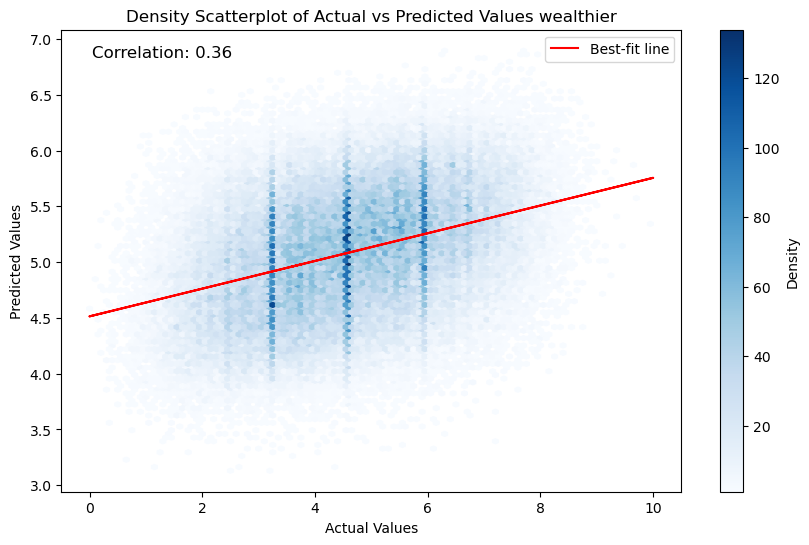

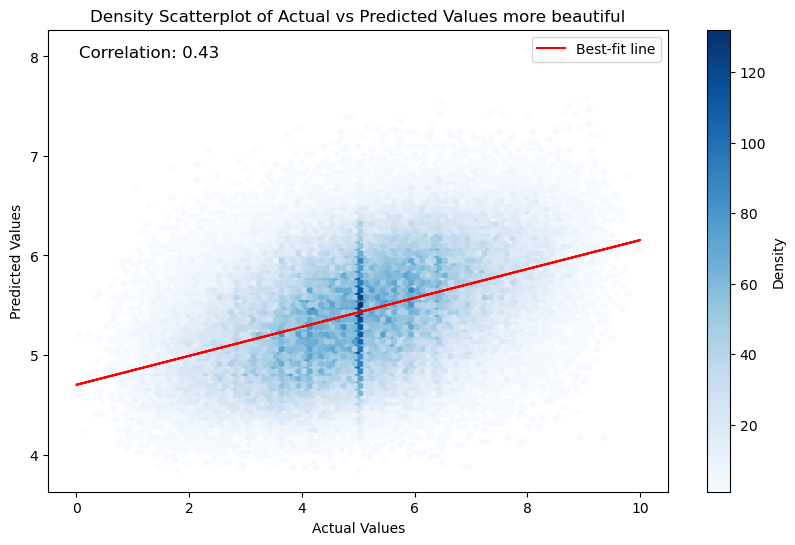

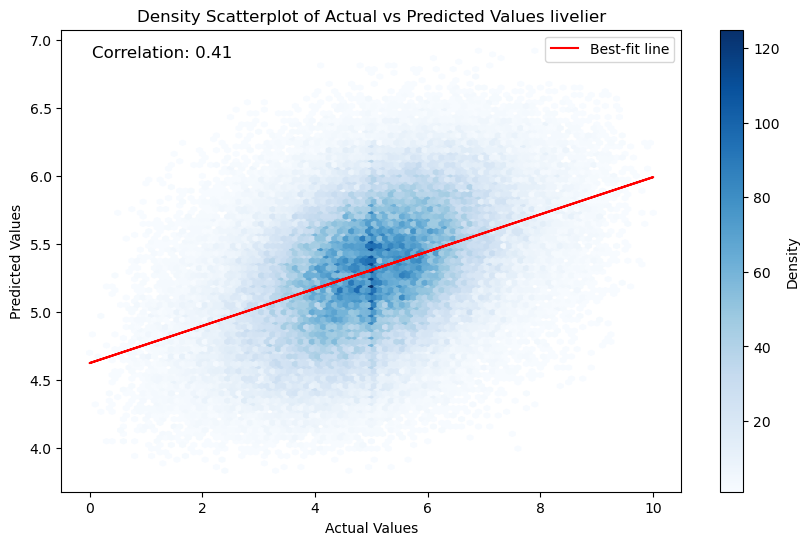

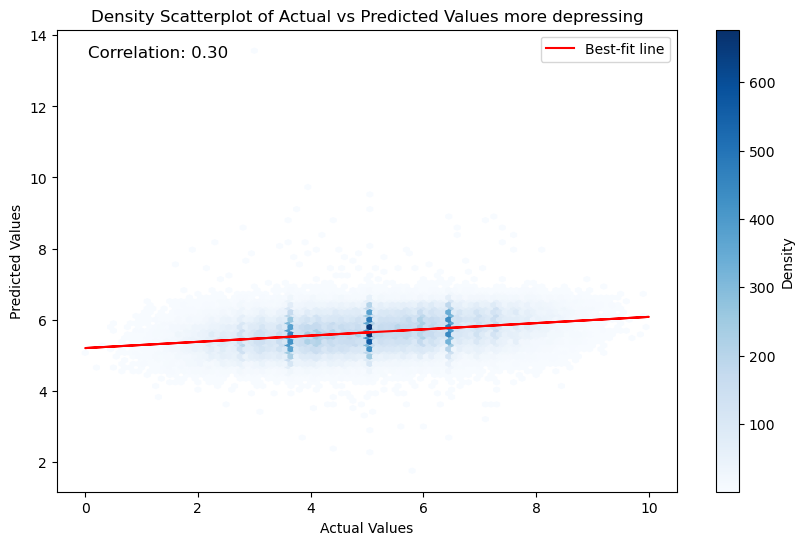

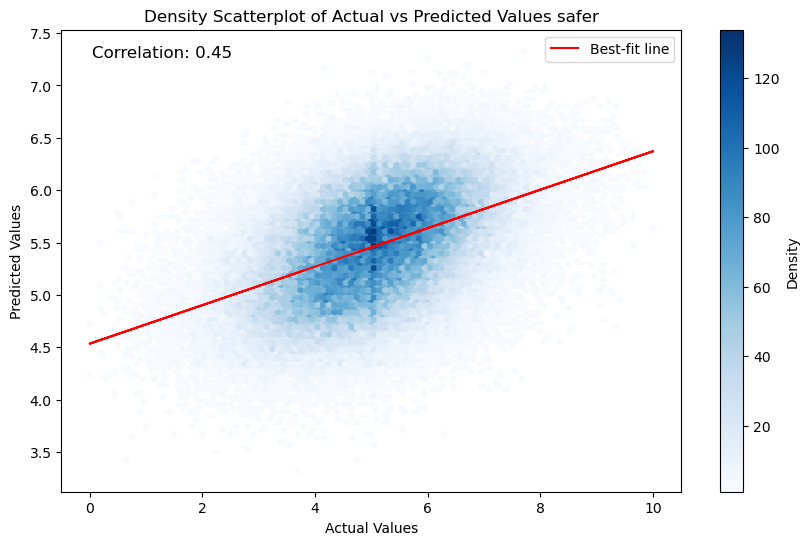

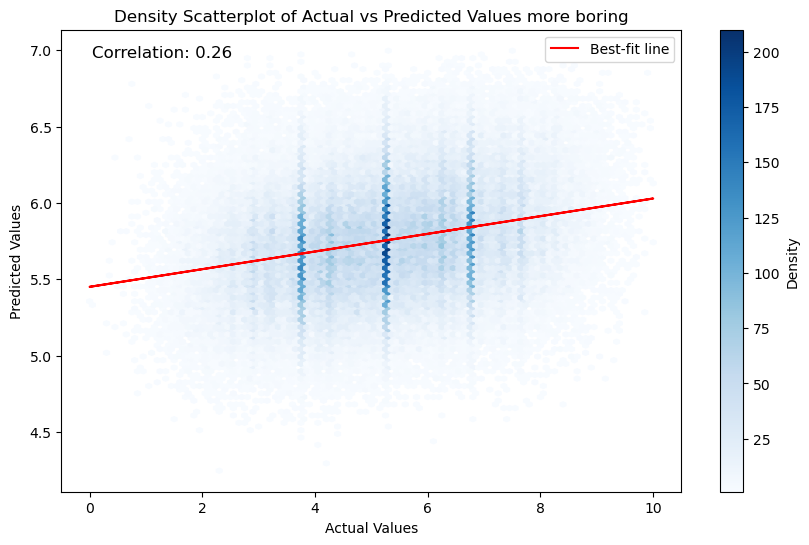

In [25]:
for perception in list(trueskill_data['study_id'].unique()):


    data = combined_pred[[perception, f'{perception}_norm_act']]
    data = data.dropna()

    data = data.rename(columns={perception: "Predicted", f'{perception}_norm_act': "Actual"})
    # Calculate the correlation coefficient
    corr_coef, _ = pearsonr(data['Actual'], data['Predicted'])

    # Fit a linear regression model for best-fit line
    model = LinearRegression()
    model.fit(data[['Actual']], data['Predicted'])
    line = model.predict(data[['Actual']])

    # Create a density scatterplot using hexbin
    plt.figure(figsize=(10, 6))
    hb = plt.hexbin(data['Actual'], data['Predicted'], gridsize=100, cmap='Blues', mincnt=1)
    plt.colorbar(hb, label='Density')

    # Plot the best-fit line
    plt.plot(data['Actual'], line, color='red', label='Best-fit line')

    # Add correlation coefficient to the plot
    plt.text(0.05, 0.95, f'Correlation: {corr_coef:.2f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')

    # Set labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Density Scatterplot of Actual vs Predicted Values {perception}')

    # Show the plot
    plt.legend()
    plt.show()



In [ ]:
combined_pred_corr = combined_pred.drop()

In [17]:
# Calculate the correlation between the actual and predicted values
correlation = combined_pred.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True)
plt.show()


ValueError: could not convert string to float: '513d573bfdc9f03587003120'

In [ ]:
combined_df

In [ ]:
df_list[0].merge(df_list[1], on='image_filename', how='inner').merge(df_list[2], on='image_filename', how='inner').merge(df_list[3], on='image_filename', how='inner').merge(df_list[4], on='image_filename', how='inner').merge(df_list[5], on='image_filename', how='inner')

In [ ]:
df_list[0].merge(df_list[1], on='image_filename', how='inner')

In [ ]:
pd.merge(df_list[0],df_list[1], left_on = 'image_filename', right_on = 'image_filename', how = 'inner')

In [ ]:
df_list[0]

In [ ]:
combined_df = reduce(lambda x,y: pd.merge(x,y, on='image_filename', how='outer'), df_list)

In [ ]:
main_df = pd.DataFrame(columns = df_list[0].columns) 
for df in df_list:
    main_df = pd.merge(main_df, df, on='image_filename', how='outer')

In [ ]:
main_df